<img src="page_garde_tweet.png">

<img src="entete.png">

<h1 > <center> Mini projet: Classifiction des Tweets </center></h1>
<h3 style="text-align: right;">Réalisé par : Wissal FARJALLAH</h3>

---------------------
<h3>RÉSUMÉ : </h3>
<br>
<p> Dans ce travail nous présentons la chaine de traitement ainsi que le processus de classification de publications sur les réseaux sociaux (notamment Twitter) en se basant sur le streaming des tweets en temps réel l'aide de l'API de Tweeter et nous proposons un modèle pour classification parmi les modeles de machine learning classique   

Mots clés: 
   
    ==> Tweeter, API, NLP, nltk, Kmeans, Clustering
</p>

---------------------
<h3>I. INTRODUCTION : </h3>

Avec les progrès techniques du web et des capacités de stockage et d’échanges
sur Internet. Les réseaux sociaux connaissent une explosion en termes de volume
de données et en fonction du nombre d’utilisateurs à travers le monde. Cette
utilisation quotidienne des réseaux comme Twitter et Instagram a changé l’image
du web 2.0 et lui a donné une nouvelle dimension et aussi de nouveaux défis.

Actuellement Twitter est une source géante de données avec 320 millions
d’utilisateurs actifs et plus de 500 millions de tweets qui sont publiés chaque
jour en 35 langues .

Avec ce volume important des données, Twitter est devenu dernièrement un
champ de recherche très attractif pour plusieurs acteurs de société, plus particulièrement les agences de presse, les entreprises, les chercheurs en informatique
et science de l’information, les psychologues et les sociologues. Ces domaines de
recherche concernent principalement l’étude de marché, le suivi de campagnes
publicitaires, l’analyse de tendances, analyse de comportement humain, social et
individuel, la détection des maladies et l’identification des personnes influentes,
etc.

---------------------
<h3>II. PROBLÉMATIQUE & SOLUTION PROPOSÉE : </h3>

Dans ce travail nous présenterons un modél de classification des publications (Tweets) sur le Twitter sous forme de groupes de sorte à ce qu’on présente à l’utilisateur un seul Tweet de chaque groupe. 

Vu le nombre colossal de Tweets, et faute de temps, l'utilisateur n’a pas la possibilité de les lire  tous. Pour  cela,ce modéle va jouer le rôle d’assistant qui va effectuer un résumé de toutes ces informations.

---------------------
<h3>III. RÉALISATION : </h3>


<h4>1. CHOIX DE MÉTHODOLOGIE DE TRAVAIL: </h4>
<h4> CRIPS-DM </h4>
<p> La méthode CRISP (initialement connue comme CRISP-DM) a été au départ développée par IBM dans les années 60 pour réaliser les projets Datamining. Elle reste aujourd’hui la seule méthode utilisable efficacement pour tous les projets Data Science.
    
La méthode CRISP se décompose en 6 étapes allant de la compréhension du problème métier au déploiement et la mise en production.

Dans la suite de ce rapport, on va détailler chaque étape en préciant les méthodes et les fonctions qu'on doit appliquer sur notre base dz données de tweets ainsi que les bibliothéques nécessaires

<img src="crisp_dm.png">

<h4>1. La compréhension du problème métier (Business Understanding) : </h4>
<p> La première étape consiste à bien comprendre les éléments métiers et problématiques que la Data Science vise à résoudre ou à améliorer.
    
==> notre probématique est la besoin d'un modèle de classification des tweets pour aider les utilisateurs de poursuivre tous les actualités sans besoin de lire tout les tweets </p>

<h4>2. La compréhension des données (Data Understanding) : </h4>
<p> Cette phase vise à déterminer précisément les données à analyser, à identifier la qualité des données disponibles et à faire le lien entre les données et leur signification d’un point de vue métier. La Data Science étant basée sur les données seules, les problèmes métiers relatifs à des données existantes, qu’elles soient internes ou externes, peuvent ainsi être résolus par la Data Science.
    
==> concernant notre projet, dans cette phase, nous avans tout d'abord extraire les tweets à l'aide de l'API de Twitter et la bibliothéque Tweepy de python : on peut extraire ces tweets avec plusieurs façons et on a tester deux parmi ces façons : la première consiste à faire le streaming des tweets en temps réel alors que la deuxième méthode consiste à faire la recherche des tweets par mots clés (on a choisi "#" comme mot clés pour donner des tweets de plusieurs thémes ) <p>

<p>Pour pouvoir extraire des tweets, Twitter nous offrit, comme developpeurs : 
    
    * consumer key
    * consumer secret
    * access key
    * access secret
</p>

In [1]:
#stremming tweets

import tweepy as tw
import pandas as pd

# authorization tokens
consumer_key ="MIWJsJk14aIL8EpzqdQRUhJAW"
consumer_secret ="GjYZM43unQQyYNTvLmOGIj0ldie0voHsE7aHrcyyGencQOF3sm"
access_key = "1325166236917919745-jmhF0eA1OLhXNye6JLCMyapxgTxnin"
access_secret = "VDl5v1vBqbR0CYksmIqUU2ZPi9fIUm6cWaTgrFCvNopxV"

<p> La cellule ci-dessous présente la portion de code qui nous a permis de faire de streaming des tweets en temps réel, nous avons choisi plusieurs themes tel que : sport, game, Heath, Game, Politic, Sport, covid, news, America, Africa,Europe

on l'a mis en commentaire car l'execution prend du temps (on a déja préparer à l'aide de ce code un fichier csv "out_news_simple.csv" qui contient plus que 10000 tweets mais si vous avez du temps vous pouvez vérifier que tout est fonctionnel</p>

In [ ]:
"""
# StreamListener class inherits from tweepy.
class StreamListener(tw.StreamListener):
    def on_status(self, status):
        print(status.id_str)
        text= status.text
        # remove characters that might cause problems with csv encoding
        remove_characters = [",","\n"]
        for c in remove_characters:
            text.replace(c," ")
        
        with open("out_news_simple.csv", "a", encoding='utf-8') as f:
            f.write("%s,%s,%s \n" % (status.created_at,status.id,text))
if __name__ == "__main__":

    # initialize stream
    streamListener = StreamListener()
    stream = tw.Stream(auth=api.auth, listener=streamListener,tweet_mode='extended')
    with open("out_news_simple.csv", "w", encoding='utf-8') as f:
        f.write("date,tweet_id,Tweet\n")
    tags = ["Heath, Game, Politic, Sport, covid, news, America, Africa,Europe"]
    stream.filter(track=tags, languages=['en'])
"""

Alors que cette cellule represente la deuxième méthode qui consiste à chercher les tweets par mots clés 

In [ ]:
"""auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)


search_words ='#'
date = "2020-11-01" # choose any date with the format "yyyy-mm-dd"
posts =[]
tweets = tw.Cursor(api.search,q=search_words,lang="en",since=date).items(15000)
for tweet in tweets:
    #print(tweet.id,tweet.user.screen_name,tweet.created_at,tweet.text,len(tweet.text))
    posts.append([tweet.created_at,tweet.id,tweet.text])
    df_tweets = pd.DataFrame(posts).to_csv('data.csv',index=False,header=['date','tweet_id','Tweet'])
"""


<p> NB : tout au long de ce travail , on va considérer la base de données de tweets resultant de la première méthode (Streaming)

Aprés l'extration des données , on a les arrongé dans une dataframe en éliminant les tweets dupliqué , pour ce faire, on a recours à la bibliothéque pandas de python
</p>

In [49]:
import pandas as pd
tweet_df_nan= pd.read_csv('out_news_simple.csv', error_bad_lines=False)
tweet_df_nan.info()
tweet_df= tweet_df_nan.dropna()
tweet_df= tweet_df.drop_duplicates('Tweet')
tweet_df.info()
tweet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31281 entries, 0 to 31280
Data columns (total 3 columns):
date        31281 non-null object
tweet_id    21882 non-null object
Tweet       21068 non-null object
dtypes: object(3)
memory usage: 733.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13116 entries, 0 to 31278
Data columns (total 3 columns):
date        13116 non-null object
tweet_id    13116 non-null object
Tweet       13116 non-null object
dtypes: object(3)
memory usage: 409.9+ KB


b'Skipping line 7: expected 3 fields, saw 5\nSkipping line 14: expected 3 fields, saw 4\nSkipping line 18: expected 3 fields, saw 5\nSkipping line 33: expected 3 fields, saw 4\nSkipping line 47: expected 3 fields, saw 6\nSkipping line 64: expected 3 fields, saw 6\nSkipping line 72: expected 3 fields, saw 5\nSkipping line 74: expected 3 fields, saw 4\nSkipping line 83: expected 3 fields, saw 4\nSkipping line 87: expected 3 fields, saw 5\nSkipping line 88: expected 3 fields, saw 4\nSkipping line 96: expected 3 fields, saw 4\nSkipping line 98: expected 3 fields, saw 4\nSkipping line 99: expected 3 fields, saw 5\nSkipping line 102: expected 3 fields, saw 4\nSkipping line 111: expected 3 fields, saw 4\nSkipping line 112: expected 3 fields, saw 4\nSkipping line 131: expected 3 fields, saw 7\nSkipping line 151: expected 3 fields, saw 4\nSkipping line 156: expected 3 fields, saw 4\nSkipping line 167: expected 3 fields, saw 6\nSkipping line 168: expected 3 fields, saw 4\nSkipping line 169: expe

,date,tweet_id,Tweet
0,2020-12-13 00:58:45,1337924889836216322,@badimo I’m back ltr where’s news
1,2020-12-13 00:58:45,1337924889768914944,RT @SirDecka: I will give $5 to one person who...
3,2020-12-13 00:58:45,1337924889819267075,@eyerisvex @The_Cerise_Hood The worst game was...
4,2020-12-13 00:58:45,1337924889832005632,Covid-19 evolution 🤡🐘😷
5,2020-12-13 00:58:45,1337924889945251845,Sad 😥 story


<p>Pour la dernière phase de cette étape, on a choisi de visualiser les mots les plus fréquents dans la dataset dans le but de mieux comprendre les doonnées.
    
on a utilisé comme bibliothéque : 
    
    * matplotlib
    * wordcloud
</p>

(-0.5, 399.5, 199.5, -0.5)

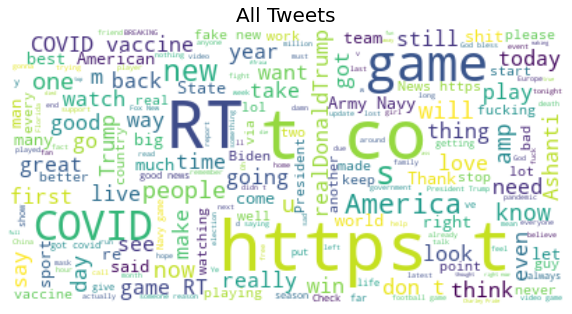

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline


from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Start with one review:
tweet_All = " ".join(review for review in tweet_df.Tweet)

# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(tweet_All)

# Display the generated image:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('All Tweets', fontsize=20)
plt.axis('off')

<h4>3. La préparation des données (Data Preparation) : </h4>
<p> Cette phase de préparation des données regroupe les activités liées à la construction de l’ensemble précis des données à analyser, faite à partir des données brutes. Elle inclut ainsi le classement des données en fonction de critères choisis, le nettoyage des données, et surtout leur recodage pour les rendre compatibles avec les algorithmes qui seront utilisés.
    
==> pour bien préparer les données, on va diviser cette phases en 2 grandes parties:
    
    * Prétraitement des tweets
    * Traitement destweets: NLP (Natural LanguageProcessing)
</p>
    

<h4>3.1.  Prétraitement des tweets : </h4>
<p> Dans cette étape, l’objectif est d’éliminer le texte inutile des tweets tels que les #, les noms des utilisateurs,les url, ... 

Dans un premier lieu, on va eliminer les émojis avec ses différents formats grace à des patterns prédéfinis </p>

In [5]:
#cleaning Data
#removing emojis
import re

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           "\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                           "]+", flags=re.UNICODE)
    text= emoji_pattern.sub(r' ', text)
    return text
tweet_df['Tweet_emoji']= tweet_df['Tweet'].apply(lambda x: remove_emoji(x))
tweet_df.head(10)

,date,tweet_id,Tweet,Tweet_emoji
0,2020-12-13 00:58:45,1337924889836216322,@badimo I’m back ltr where’s news,@badimo I’m back ltr where’s news
1,2020-12-13 00:58:45,1337924889768914944,RT @SirDecka: I will give $5 to one person who...,RT @SirDecka: I will give $5 to one person who...
3,2020-12-13 00:58:45,1337924889819267075,@eyerisvex @The_Cerise_Hood The worst game was...,@eyerisvex @The_Cerise_Hood The worst game was...
4,2020-12-13 00:58:45,1337924889832005632,Covid-19 evolution 🤡🐘😷,Covid-19 evolution
5,2020-12-13 00:58:45,1337924889945251845,Sad 😥 story,Sad story
7,2020-12-13 00:58:45,1337924890188509184,RT @Chesschick01: Your odds of dying from eati...,RT @Chesschick01: Your odds of dying from eati...
8,2020-12-13 00:58:45,1337924890175959040,RT @2tired2retire: @40_Ronda must see video. ...,RT @2tired2retire: @40_Ronda must see video. ...
9,2020-12-13 00:58:45,1337924890159026176,@SunRayB Playing games for making a video does...,@SunRayB Playing games for making a video does...
10,2020-12-13 00:58:45,1337924890108706816,Doesn't use a single example of how Cyberpunk ...,Doesn't use a single example of how Cyberpunk ...
12,2020-12-13 00:58:45,1337924890272272384,@lowkeydbjosh More Time limited Game modes and...,@lowkeydbjosh More Time limited Game modes and...


<p>Ensuite, on a developpé une fonction qui permet d'éliminer les ponctuations, les URL , les Rt afin de nettoyer au maximum les tweets pour faciliter la tache de la bibliothéque ntlk.</p>

In [6]:
#remove ponctuation and links
def remove_punct(text):
    text = text.lower()
    text = re.sub(r'https?:\/\/\S*', ' ', text, flags=re.MULTILINE) #remove links
    text= re.sub(r'rt @+',' ',text, flags=re.MULTILINE)#remove RT
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text

tweet_df['Tweet_punct'] = tweet_df['Tweet_emoji'].apply(lambda x: remove_punct(x))

tweet_df.head(10)

,date,tweet_id,Tweet,Tweet_emoji,Tweet_punct
0,2020-12-13 00:58:45,1337924889836216322,@badimo I’m back ltr where’s news,@badimo I’m back ltr where’s news,badimo i’m back ltr where’s news
1,2020-12-13 00:58:45,1337924889768914944,RT @SirDecka: I will give $5 to one person who...,RT @SirDecka: I will give $5 to one person who...,sirdecka i will give to one person who retw...
3,2020-12-13 00:58:45,1337924889819267075,@eyerisvex @The_Cerise_Hood The worst game was...,@eyerisvex @The_Cerise_Hood The worst game was...,eyerisvex thecerisehood the worst game was par...
4,2020-12-13 00:58:45,1337924889832005632,Covid-19 evolution 🤡🐘😷,Covid-19 evolution,covid evolution
5,2020-12-13 00:58:45,1337924889945251845,Sad 😥 story,Sad story,sad story
7,2020-12-13 00:58:45,1337924890188509184,RT @Chesschick01: Your odds of dying from eati...,RT @Chesschick01: Your odds of dying from eati...,chesschick your odds of dying from eating to...
8,2020-12-13 00:58:45,1337924890175959040,RT @2tired2retire: @40_Ronda must see video. ...,RT @2tired2retire: @40_Ronda must see video. ...,tired retire ronda must see video are we ...
9,2020-12-13 00:58:45,1337924890159026176,@SunRayB Playing games for making a video does...,@SunRayB Playing games for making a video does...,sunrayb playing games for making a video doesn...
10,2020-12-13 00:58:45,1337924890108706816,Doesn't use a single example of how Cyberpunk ...,Doesn't use a single example of how Cyberpunk ...,doesnt use a single example of how cyberpunk r...
12,2020-12-13 00:58:45,1337924890272272384,@lowkeydbjosh More Time limited Game modes and...,@lowkeydbjosh More Time limited Game modes and...,lowkeydbjosh more time limited game modes and ...


<p> Aprés la première étape de préparation des données , il ya des tweets qui deviennent identiques , pour cela on fait l'appel autre fois à la methodes "drop_duplicates()" </p>

In [7]:
tweet_df= tweet_df.drop_duplicates('Tweet_punct')
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12869 entries, 0 to 31278
Data columns (total 5 columns):
date           12869 non-null object
tweet_id       12869 non-null object
Tweet          12869 non-null object
Tweet_emoji    12869 non-null object
Tweet_punct    12869 non-null object
dtypes: object(5)
memory usage: 603.2+ KB


<h4>3.2. Traitement destweets: NLP (Natural LanguageProcessing) : </h4>
<p> On doit procéder à l’analyse du tweet en respectant les différentes étapes du NLP (Natural Language Processing). La bibliothèque utilisé est NLTK de Python. 
    
les différents étapes du natural language processing sont : 

    - Tokeniser les données
    - Supprimer les mots vides
    - Normaliser les données
    - vectoriser les données
</p>
<h4> 3.2.1. Tokeniser les données : </h4> 
<p> La langue dans sa forme originale ne peut pas être traitée avec précision par une machine. on doit donc la traiter pour la rendre plus facile à comprendre. Pour donner un sens aux données, la première étape consiste à utiliser un processus appelé tokenization ou à scinder des chaînes en parties plus petites appelées tokens.

Pour ce faire, on a besoin de la fonction "word_tokenize" dans la classe "tokenize" de la bibliothéque nltk 
</p>

In [8]:
#Tokenization

from nltk.tokenize import word_tokenize

tweet_df['Tweet_tokenized'] = tweet_df['Tweet_punct'].apply(lambda x: word_tokenize(x.lower()))
tweet_df.head(10)

,date,tweet_id,Tweet,Tweet_emoji,Tweet_punct,Tweet_tokenized
0,2020-12-13 00:58:45,1337924889836216322,@badimo I’m back ltr where’s news,@badimo I’m back ltr where’s news,badimo i’m back ltr where’s news,"[badimo, i, ’, m, back, ltr, where, ’, s, news]"
1,2020-12-13 00:58:45,1337924889768914944,RT @SirDecka: I will give $5 to one person who...,RT @SirDecka: I will give $5 to one person who...,sirdecka i will give to one person who retw...,"[sirdecka, i, will, give, to, one, person, who..."
3,2020-12-13 00:58:45,1337924889819267075,@eyerisvex @The_Cerise_Hood The worst game was...,@eyerisvex @The_Cerise_Hood The worst game was...,eyerisvex thecerisehood the worst game was par...,"[eyerisvex, thecerisehood, the, worst, game, w..."
4,2020-12-13 00:58:45,1337924889832005632,Covid-19 evolution 🤡🐘😷,Covid-19 evolution,covid evolution,"[covid, evolution]"
5,2020-12-13 00:58:45,1337924889945251845,Sad 😥 story,Sad story,sad story,"[sad, story]"
7,2020-12-13 00:58:45,1337924890188509184,RT @Chesschick01: Your odds of dying from eati...,RT @Chesschick01: Your odds of dying from eati...,chesschick your odds of dying from eating to...,"[chesschick, your, odds, of, dying, from, eati..."
8,2020-12-13 00:58:45,1337924890175959040,RT @2tired2retire: @40_Ronda must see video. ...,RT @2tired2retire: @40_Ronda must see video. ...,tired retire ronda must see video are we ...,"[tired, retire, ronda, must, see, video, are, ..."
9,2020-12-13 00:58:45,1337924890159026176,@SunRayB Playing games for making a video does...,@SunRayB Playing games for making a video does...,sunrayb playing games for making a video doesn...,"[sunrayb, playing, games, for, making, a, vide..."
10,2020-12-13 00:58:45,1337924890108706816,Doesn't use a single example of how Cyberpunk ...,Doesn't use a single example of how Cyberpunk ...,doesnt use a single example of how cyberpunk r...,"[doesnt, use, a, single, example, of, how, cyb..."
12,2020-12-13 00:58:45,1337924890272272384,@lowkeydbjosh More Time limited Game modes and...,@lowkeydbjosh More Time limited Game modes and...,lowkeydbjosh more time limited game modes and ...,"[lowkeydbjosh, more, time, limited, game, mode..."


<h4> 3.2.2. Supprimer les mots vides : </h4> 
<p> Les mots vides sont les mots les plus utilisés comme remplisseurs et n'ont guère de sens utile. on devrait éviter que ces mots prennent de la place dans la base de données ou prennent un temps de traitement précieux. on peut facilement faire une liste de mots à utiliser comme mots vides, puis filtrer ces mots à partir des données qu'on veut traiter.

dans cette phase , on a recours à la bibliothèque "corpus" de "nltk" pour importer "stopwords"
</p>

In [9]:
#delete stop words 
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['please', 'commute','asking','old', 'new', 'age', 'lot', 'bag', 'top','can', 'get', 'fan', 'fun', 'big',\
             'use', 'pea', 'pit','pot', 'pat', 'ear', 'eye', 'kit', 'pot', 'pen', 'bud', 'bet', 'god', 'tax', 'won', 'run',\
              'lid', 'log', 'pr', 'pd', 'cop', 'nyc', 'ny', 'la', 'toy', 'war', 'law', 'lax', 'jfk', 'fed', 'cry', 'ceo',\
              'pay', 'pet', 'fan', 'fun', 'usd', 'rio','here', 'there', 'where', 'when', 'would', 'should', 'could','thats', 'youre', 'thanks', 'hasn',\
             'thank', 'https', 'since', 'wanna', 'gonna', 'aint', 'http', 'unto', 'onto', 'into', 'havent',\
             'dont', 'done', 'cant', 'werent', 'https', 'u', 'isnt', 'go', 'theyre', 'each', 'every', 'shes', 'youve', 'youll',\
            'weve', 'theyve','googleele' , 'goog', 'lyin', 'lie', 'googles', 'goog', 'aapl','apple',\
             'msft','microsoft', 'google', 'goog', 'googl','goog','https'])
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweet_df['Tweet_nonstop'] = tweet_df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweet_df.head(10)

,date,tweet_id,Tweet,Tweet_emoji,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,2020-12-13 00:58:45,1337924889836216322,@badimo I’m back ltr where’s news,@badimo I’m back ltr where’s news,badimo i’m back ltr where’s news,"[badimo, i, ’, m, back, ltr, where, ’, s, news]","[badimo, ’, back, ltr, ’, news]"
1,2020-12-13 00:58:45,1337924889768914944,RT @SirDecka: I will give $5 to one person who...,RT @SirDecka: I will give $5 to one person who...,sirdecka i will give to one person who retw...,"[sirdecka, i, will, give, to, one, person, who...","[sirdecka, give, one, person, retweets, within..."
3,2020-12-13 00:58:45,1337924889819267075,@eyerisvex @The_Cerise_Hood The worst game was...,@eyerisvex @The_Cerise_Hood The worst game was...,eyerisvex thecerisehood the worst game was par...,"[eyerisvex, thecerisehood, the, worst, game, w...","[eyerisvex, thecerisehood, worst, game, parkou..."
4,2020-12-13 00:58:45,1337924889832005632,Covid-19 evolution 🤡🐘😷,Covid-19 evolution,covid evolution,"[covid, evolution]","[covid, evolution]"
5,2020-12-13 00:58:45,1337924889945251845,Sad 😥 story,Sad story,sad story,"[sad, story]","[sad, story]"
7,2020-12-13 00:58:45,1337924890188509184,RT @Chesschick01: Your odds of dying from eati...,RT @Chesschick01: Your odds of dying from eati...,chesschick your odds of dying from eating to...,"[chesschick, your, odds, of, dying, from, eati...","[chesschick, odds, dying, eating, many, cheeto..."
8,2020-12-13 00:58:45,1337924890175959040,RT @2tired2retire: @40_Ronda must see video. ...,RT @2tired2retire: @40_Ronda must see video. ...,tired retire ronda must see video are we ...,"[tired, retire, ronda, must, see, video, are, ...","[tired, retire, ronda, must, see, video, told,..."
9,2020-12-13 00:58:45,1337924890159026176,@SunRayB Playing games for making a video does...,@SunRayB Playing games for making a video does...,sunrayb playing games for making a video doesn...,"[sunrayb, playing, games, for, making, a, vide...","[sunrayb, playing, games, making, video, doesn..."
10,2020-12-13 00:58:45,1337924890108706816,Doesn't use a single example of how Cyberpunk ...,Doesn't use a single example of how Cyberpunk ...,doesnt use a single example of how cyberpunk r...,"[doesnt, use, a, single, example, of, how, cyb...","[doesnt, single, example, cyberpunk, runs, ps,..."
12,2020-12-13 00:58:45,1337924890272272384,@lowkeydbjosh More Time limited Game modes and...,@lowkeydbjosh More Time limited Game modes and...,lowkeydbjosh more time limited game modes and ...,"[lowkeydbjosh, more, time, limited, game, mode...","[lowkeydbjosh, time, limited, game, modes, eve..."


<h4> 3.2.3. Normaliser les données : </h4> 
<p> La normalisation permet de regrouper des mots ayant la même signification mais des formes différentes. Sans normalisation, les termes «exécuté», «exécuté» et «exécuté» seraient traités comme des mots différents, même si on souhaite qu’ils soient traités comme le même mot. 
    
Dans cette section, on explore les méthodes de création de tige et de lmatmatisation, deux techniques de normalisation populaires.

Commancant par le Stemming, qui utilise uniquement des formes verbales simples, est un processus heuristique qui supprime la fin des mots. </p>

In [10]:
#stemming :removes the last few characters

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_df['Tweet_stemmed'] = tweet_df['Tweet_nonstop'].apply(lambda x: stemming(x))
tweet_df.head(10)

,date,tweet_id,Tweet,Tweet_emoji,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,2020-12-13 00:58:45,1337924889836216322,@badimo I’m back ltr where’s news,@badimo I’m back ltr where’s news,badimo i’m back ltr where’s news,"[badimo, i, ’, m, back, ltr, where, ’, s, news]","[badimo, ’, back, ltr, ’, news]","[badimo, ’, back, ltr, ’, news]"
1,2020-12-13 00:58:45,1337924889768914944,RT @SirDecka: I will give $5 to one person who...,RT @SirDecka: I will give $5 to one person who...,sirdecka i will give to one person who retw...,"[sirdecka, i, will, give, to, one, person, who...","[sirdecka, give, one, person, retweets, within...","[sirdecka, give, one, person, retweet, within,..."
3,2020-12-13 00:58:45,1337924889819267075,@eyerisvex @The_Cerise_Hood The worst game was...,@eyerisvex @The_Cerise_Hood The worst game was...,eyerisvex thecerisehood the worst game was par...,"[eyerisvex, thecerisehood, the, worst, game, w...","[eyerisvex, thecerisehood, worst, game, parkou...","[eyerisvex, thecerisehood, worst, game, parkou..."
4,2020-12-13 00:58:45,1337924889832005632,Covid-19 evolution 🤡🐘😷,Covid-19 evolution,covid evolution,"[covid, evolution]","[covid, evolution]","[covid, evolut]"
5,2020-12-13 00:58:45,1337924889945251845,Sad 😥 story,Sad story,sad story,"[sad, story]","[sad, story]","[sad, stori]"
7,2020-12-13 00:58:45,1337924890188509184,RT @Chesschick01: Your odds of dying from eati...,RT @Chesschick01: Your odds of dying from eati...,chesschick your odds of dying from eating to...,"[chesschick, your, odds, of, dying, from, eati...","[chesschick, odds, dying, eating, many, cheeto...","[chesschick, odd, die, eat, mani, cheeto, chok..."
8,2020-12-13 00:58:45,1337924890175959040,RT @2tired2retire: @40_Ronda must see video. ...,RT @2tired2retire: @40_Ronda must see video. ...,tired retire ronda must see video are we ...,"[tired, retire, ronda, must, see, video, are, ...","[tired, retire, ronda, must, see, video, told,...","[tire, retir, ronda, must, see, video, told, t..."
9,2020-12-13 00:58:45,1337924890159026176,@SunRayB Playing games for making a video does...,@SunRayB Playing games for making a video does...,sunrayb playing games for making a video doesn...,"[sunrayb, playing, games, for, making, a, vide...","[sunrayb, playing, games, making, video, doesn...","[sunrayb, play, game, make, video, doesnt, giv..."
10,2020-12-13 00:58:45,1337924890108706816,Doesn't use a single example of how Cyberpunk ...,Doesn't use a single example of how Cyberpunk ...,doesnt use a single example of how cyberpunk r...,"[doesnt, use, a, single, example, of, how, cyb...","[doesnt, single, example, cyberpunk, runs, ps,...","[doesnt, singl, exampl, cyberpunk, run, ps, se..."
12,2020-12-13 00:58:45,1337924890272272384,@lowkeydbjosh More Time limited Game modes and...,@lowkeydbjosh More Time limited Game modes and...,lowkeydbjosh more time limited game modes and ...,"[lowkeydbjosh, more, time, limited, game, mode...","[lowkeydbjosh, time, limited, game, modes, eve...","[lowkeydbjosh, time, limit, game, mode, event]"


<p> Alors que le processus de lemmatisation normalise un mot avec le contexte du vocabulaire et l'analyse morphologique des mots dans le texte. 
    
L’algorithme de lemmatisation analyse la structure du mot et son contexte pour le convertir en une forme normalisée. Par conséquent, cela a un coût de rapidité. Une comparaison entre l’arrêt et la lemmatisation revient finalement à un compromis entre vitesse et précision.</p>

In [11]:
#Lemmatization is the process of converting a word to its base form.
#The difference between stemming and lemmatization is, 
#lemmatization considers the context and converts the word to its meaningful base form
#whereas stemming just removes the last few characters

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweet_df['Tweet_lemmatized'] = tweet_df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
tweet_df.head(10)

,date,tweet_id,Tweet,Tweet_emoji,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,2020-12-13 00:58:45,1337924889836216322,@badimo I’m back ltr where’s news,@badimo I’m back ltr where’s news,badimo i’m back ltr where’s news,"[badimo, i, ’, m, back, ltr, where, ’, s, news]","[badimo, ’, back, ltr, ’, news]","[badimo, ’, back, ltr, ’, news]","[badimo, ’, back, ltr, ’, news]"
1,2020-12-13 00:58:45,1337924889768914944,RT @SirDecka: I will give $5 to one person who...,RT @SirDecka: I will give $5 to one person who...,sirdecka i will give to one person who retw...,"[sirdecka, i, will, give, to, one, person, who...","[sirdecka, give, one, person, retweets, within...","[sirdecka, give, one, person, retweet, within,...","[sirdecka, give, one, person, retweets, within..."
3,2020-12-13 00:58:45,1337924889819267075,@eyerisvex @The_Cerise_Hood The worst game was...,@eyerisvex @The_Cerise_Hood The worst game was...,eyerisvex thecerisehood the worst game was par...,"[eyerisvex, thecerisehood, the, worst, game, w...","[eyerisvex, thecerisehood, worst, game, parkou...","[eyerisvex, thecerisehood, worst, game, parkou...","[eyerisvex, thecerisehood, worst, game, parkou..."
4,2020-12-13 00:58:45,1337924889832005632,Covid-19 evolution 🤡🐘😷,Covid-19 evolution,covid evolution,"[covid, evolution]","[covid, evolution]","[covid, evolut]","[covid, evolution]"
5,2020-12-13 00:58:45,1337924889945251845,Sad 😥 story,Sad story,sad story,"[sad, story]","[sad, story]","[sad, stori]","[sad, story]"
7,2020-12-13 00:58:45,1337924890188509184,RT @Chesschick01: Your odds of dying from eati...,RT @Chesschick01: Your odds of dying from eati...,chesschick your odds of dying from eating to...,"[chesschick, your, odds, of, dying, from, eati...","[chesschick, odds, dying, eating, many, cheeto...","[chesschick, odd, die, eat, mani, cheeto, chok...","[chesschick, odds, dying, eating, many, cheeto..."
8,2020-12-13 00:58:45,1337924890175959040,RT @2tired2retire: @40_Ronda must see video. ...,RT @2tired2retire: @40_Ronda must see video. ...,tired retire ronda must see video are we ...,"[tired, retire, ronda, must, see, video, are, ...","[tired, retire, ronda, must, see, video, told,...","[tire, retir, ronda, must, see, video, told, t...","[tired, retire, ronda, must, see, video, told,..."
9,2020-12-13 00:58:45,1337924890159026176,@SunRayB Playing games for making a video does...,@SunRayB Playing games for making a video does...,sunrayb playing games for making a video doesn...,"[sunrayb, playing, games, for, making, a, vide...","[sunrayb, playing, games, making, video, doesn...","[sunrayb, play, game, make, video, doesnt, giv...","[sunrayb, playing, game, making, video, doesnt..."
10,2020-12-13 00:58:45,1337924890108706816,Doesn't use a single example of how Cyberpunk ...,Doesn't use a single example of how Cyberpunk ...,doesnt use a single example of how cyberpunk r...,"[doesnt, use, a, single, example, of, how, cyb...","[doesnt, single, example, cyberpunk, runs, ps,...","[doesnt, singl, exampl, cyberpunk, run, ps, se...","[doesnt, single, example, cyberpunk, run, p, s..."
12,2020-12-13 00:58:45,1337924890272272384,@lowkeydbjosh More Time limited Game modes and...,@lowkeydbjosh More Time limited Game modes and...,lowkeydbjosh more time limited game modes and ...,"[lowkeydbjosh, more, time, limited, game, mode...","[lowkeydbjosh, time, limited, game, modes, eve...","[lowkeydbjosh, time, limit, game, mode, event]","[lowkeydbjosh, time, limited, game, mode, event]"


<p>Aprés cette étape, on peut dire dire qu'on a terminé l'étape de nettyoage de données , il ne reste que la vectorisation pour que l'algorithme de kmeans peut comprendre et traiter ces données textuelles.

Mais avant l'étape de vectorisation, on trouve que c'est mieux de visualiser encore une fois les données pour distinguer la différence et comprendre l'effet de la bibliothèque nltk

On a utilisé la bibliothèque stylecloud pour que la visualisation soit plus representative (on a choisi le logo de Twitter comme icone )</p>

In [12]:
from wordcloud import WordCloud, ImageColorGenerator
import stylecloud
import cv2

# Start with one review:
tweet_All = " ".join(review for review in tweet_df['Tweet_lemmatized'].apply(lambda x: ' '.join(x)))

stylecloud = stylecloud.gen_stylecloud(tweet_All, 
                                       icon_name= "fab fa-twitter", 
                                       palette="cartocolors.diverging.TealRose_7", 
                                       background_color="black")

#style_tweet = cv2.imread("stylecloud.png")
#plt.figure(figsize = (10,10))
#plt.imshow(style_tweet)
#plt.axis('off')

<img src="stylecloud.png">

<h4> 3.2.4. Vectoriser les données : </h4>
<p>Une fois le texte bien nettoyé , il faudra le vectoriser . Oui car une fois qu'on aura vectorisé le texte (On va transformer le texte en données numériques) on pourra faire des calculs et donc de la modélisation (classification, clustering etc.) !
    
Il a différente manière de vectoriser votre texte :

   * Vecteur par comptage
   * Vecteur TF-IDF
   * Vecteur de co-occurrence
on a presenté deux types de vectorisation avec les Tweets : coutVectorizer() et TfidfVectorizer()

<img src="countvectorizer.png">

In [13]:
#vectorization
countVectorizer = CountVectorizer() 
countVector = countVectorizer.fit_transform(tweet_df['Tweet_lemmatized'].apply(lambda x: ' '.join(x)))
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
count_vect_df = pd.DataFrame(countVector.todense(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

12869 Number of tweets has 23462 words


,aa,aaa,aaaaaa,aaaaaaaaa,aaaaaand,aaaaahhhh,aampb,aampm,aantonop,aapkadharam,...,zzyzyx,اینآراوکےسوالی,งหน,บในป,รวมรางว,ลท,หน,าโรงcarnivalfunmeet,เอก,ได
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<img src="tfidf.png">

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix_tfidf = vec.fit(tweet_df['Tweet_lemmatized'].apply(lambda x: ' '.join(x)))
text = vec.transform(tweet_df['Tweet_lemmatized'].apply(lambda x: ' '.join(x)))
tfidf_vect_df= pd.DataFrame(text.toarray(), columns=vec.get_feature_names())
print(tfidf_vect_df.shape)
tfidf_vect_df.head()

(12869, 23462)


,aa,aaa,aaaaaa,aaaaaaaaa,aaaaaand,aaaaahhhh,aampb,aampm,aantonop,aapkadharam,...,zzyzyx,اینآراوکےسوالی,งหน,บในป,รวมรางว,ลท,หน,าโรงcarnivalfunmeet,เอก,ได
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h4>4. La Modélisation (Modeling) : </h4>
<p> C’est la phase de Data Science proprement dite. La modélisation comprend le choix, le paramétrage et le test de différents algorithmes ainsi que leur enchaînement, qui constitue un modèle. Ce processus est d’abord descriptif pour générer de la connaissance, en expliquant pourquoi les choses se sont passées. Il devient ensuite prédictif en expliquant ce qu’il va se passer, puis prescriptif en permettant d’optimiser une situation future.</p>

<h4> 4.1. Regroupement ou Clustering : </h4>
<p> La mise en cluster consiste à séparer ou à diviser un ensemble de données en un certain nombre de groupes, de sorte que les ensembles de données appartenant aux mêmes groupes se ressemblent davantage que ceux d’autres groupes. En termes simples, l’objectif est de séparer les groupes ayant des traits similaires et de les assigner en grappes.</p>
<img src="comparaison.png">
<img src="kmeans1.png">

<p>Vu l'importance de cette étape, on a choisi de tester deux algorithmes de classification non supervisée : 

   * MiniBatchKMeans
   * KMeans 
et voila la différence entre Kmeans et MiniBatchKMeans ( source : site officiel scikit-learn)</p>
----------------------------


<img src="kmeans vs minibatchkmeans.png">

<h4> 4.1.1. MiniBatchKMeans : </h4>
<p> On va tout d'abord choisir le nombre de cluster optimal pour faire le meilleur regroupement des tweets </p>

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


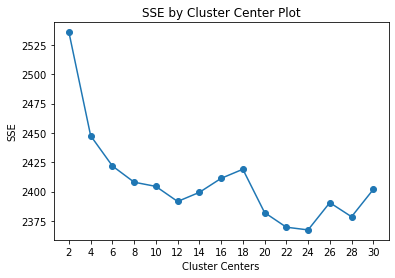

In [20]:
from sklearn.cluster import MiniBatchKMeans
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 30)

In [21]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

<p>Ici, nous traçons les clusters générés par notre opération MiniBatchKMeans. 
    
un graphe avec PCA qui est meilleur pour capturer la structure globale des données. 

L'autre avec TSNE qui est meilleur pour capturer les relations entre voisins.

Afin d'accélérer le processus avec TSNE, on a échantillonné sur 3000 documents et on a effectué une réduction de dimension = 50 sur les données. Ensuite, on a montré un nuage de points échantillonnant davantage l'échantillon jusqu'à 300 points.</p>

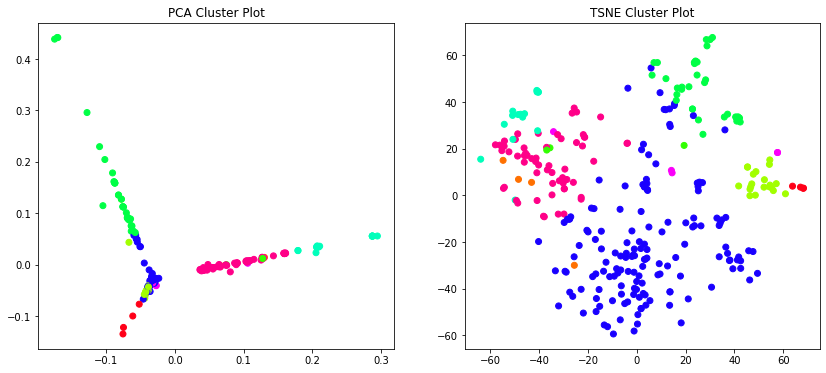

In [22]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

<p> Enfin, on va parcourir les clusters et imprimer les meilleurs mots-clés en fonction de leur score TFIDF pour voir si on peur repérer des tendances. on va le faire en calculant une valeur moyenne pour toutes les dimensions dans Pandas, regroupées par l'étiquette de cluster. En utilisant numpy, trouver les premiers mots consiste simplement à trier les valeurs moyennes de chaque ligne et à prendre le N supérieur.</p>


In [23]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, vec.get_feature_names(), 10)


Cluster 0
mysterysolvent,trash,donateplease,brown,joebiden,without,one,white,wear,mask

Cluster 1
need,someone,like,even,lsu,want,florida,let,game,play

Cluster 2
fruit,fsindiana,ได,anime,ended,liziedoodle,sonicbasedsizi,game,award,basically

Cluster 3
sad,election,say,trump,breaking,fox,latest,good,fake,news

Cluster 4
life,long,said,one,many,last,america,covid,game,day

Cluster 5
death,tested,verzuz,test,people,positive,got,vaccine,ashanti,covid

Cluster 6
one,day,best,time,win,like,florida,watch,lsu,game

Cluster 7
frynaomifry,previously,game,make,clutch,bad,player,good,able,format

Cluster 8
fruit,frozen,froze,frostywoofs,ได,wichita,christian,rodaye,kingdom,prep

Cluster 9
president,know,realdonaldtrump,one,like,love,covid,trump,people,america

Cluster 10
october,june,may,august,december,september,november,march,belindajones,day

Cluster 11
america,dearauntcrabby,morning,keep,see,luck,time,one,game,good

Cluster 12
last,trump,football,got,armynavy,time,one,first,like,game

Cluster

<h4> 4.1.2. KMeans : </h4>
<p> KMeans est un choix courant car il est très rapide pour des quantités modérées de données. Comme la plupart des algorithmes, KMeans a des paramètres qui doivent être choisis de manière appropriée. Dans ce cas, ce paramètre est "k" le nombre de clusters dans nos données.

Dans l'apprentissage non supervisé, nous ne pouvons pas facilement calculer (et optimiser) un score de précision, nous devons donc utiliser d'autres techniques pour comparer les modèles les uns aux autres pour la sélection k. 

Puisque nous ne connaissons pas ce nombre a priori , une technique consiste à comparer la valeur d'une métrique de qualité sur une plage de "ks" potentiels . Il existe un certain nombre de mesures de qualité connues , dont nous n'utiliserons que quelques- unes : 

    * le score de silhouette (plus grand est meilleur) 
    * l'inertie (plus petit est meilleur).

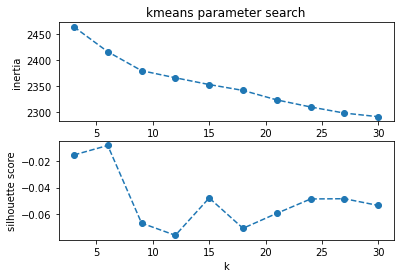

In [24]:
import logging
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# reproducible rng
seed = 42

# compare a broad range of ks to start
ks = [3, 6, 9, 12,15,18,21,24,27,30]


# track a couple of metrics
sil_scores = []
inertias = []

# fit the models, save the evaluation metrics from each run
for k in ks:
    logging.warning('fitting model for {} clusters'.format(k))
    model = KMeans(n_clusters=k, n_jobs=-1, random_state=seed)
    model.fit(text)
    labels = model.labels_
    sil_scores.append(silhouette_score(text, labels))
    inertias.append(model.inertia_)

# plot the quality metrics for inspection
fig, ax = plt.subplots(2, 1, sharex=True)

plt.subplot(211)
plt.plot(ks, inertias, 'o--')
plt.ylabel('inertia')
plt.title('kmeans parameter search')

plt.subplot(212)
plt.plot(ks, sil_scores, 'o--')
plt.ylabel('silhouette score')
plt.xlabel('k');

<p> Malheureusement, ces métriques indiqueront rarement la meilleure réponse pour le nombre de clusters appropriés. Ces deux métriques tracées approcheront asymptotiquement leur valeur «idéale», et il est donc généralement conseillé au praticien de choisir la valeur dans «le coude» de ces courbes - c'est-à-dire le point auquel les rendements semblent diminuer pour une augmentation dans k.

Pour l'instant, partons avec notre meilleure valeur k = 22, formons un nouveau modèle sur toutes nos données et continuons notre analyse </p>

In [25]:
best_k = 22

km_model = KMeans(n_clusters=best_k, n_jobs=-1, random_state=seed)
km_model.fit(text)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

<p>Nous disposons d'un modèle formé de tweetw et des clusters auxquels ils appartiennent. À ce stade, nous devons inspecter les clusters résultants pour comprendre ce que nous avons découvert. </p>

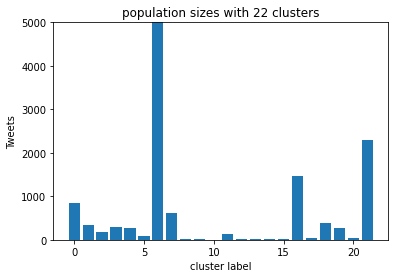

In [26]:
plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

plt.ylabel('Tweets')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(best_k));

# truncate y axis to see the rest better
# (comment out to see the peak value for the largest cluster)
plt.ylim(0,5000);

<p> Pour une autre façon d'inspecter nos résultats, elle consiste à demander: pour chaque centroïde de cluster, quels vecteurs de jeton ont la plus grande projection sur ce centroïde? Autrement dit, quels jetons sont les plus fortement associés à chaque cluster?</p>

In [27]:
def strongest_features(model, vectorizer, topk=10):
    # these parts are model-independent
    m_name = model.__class__.__name__
    features = vectorizer.get_feature_names()
    # different calculations per model type
    if m_name is 'KMeans':
        relevant_labels = list(set(model.labels_))
        centroids = model.cluster_centers_.argsort()[:,::-1]
        for this_label in relevant_labels:
            print('Cluster {}:'.format(this_label), end='')
            for ind in centroids[this_label, :topk]:
                print(' {}'.format(features[ind]), end='')
            print()
            print('*******************')
            
strongest_features(km_model, vec, topk=15)

Cluster 0: news good fake latest fox breaking day watch election amp today time like report year
*******************
Cluster 1: game good day lsu watch like florida win time night lsuvsuf hate stream see trap
*******************
Cluster 2: play game let florida want lsu like even think someone time need ever one na
*******************
Cluster 3: like game look sound really feel know think got canada one see nothing florida year
*******************
Cluster 4: covid ashanti got prevent vaccine update positive test tested bitch verzuz girl die know lol
*******************
Cluster 5: america love townhallcom trump stclairashley first open welcome know tedcruz thebradfordfile kamalaharris yes hate never
*******************
Cluster 6: one good know amp day sport need time let im great year true right think
*******************
Cluster 7: america trump realdonaldtrump people first one love country want state know president biden like bless
*******************
Cluster 8: sad news misspelled als

<p>Le volume de sortie ici est important, il est donc assez difficile à lire et à analyser - pouvons-nous vraiment faire la distinction entre un ensemble de ces listes de mots? C'est l'une des parties délicates de l'apprentissage non supervisé - il n'y a pas toujours de «meilleur» choix pour sélectionner ces paramètres.

Dans un souci de démonstration, voyons à quoi ressemblent les résultats si nous utilisons les mêmes étapes de prétraitement mais limitons le nombre de clusters à un nombre beaucoup plus petit. Notez que c'est arbitraire!</p>

In [28]:
smaller_k = 15
km_model = KMeans(n_clusters=smaller_k, n_jobs=-1, random_state=seed)
km_model.fit(text)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

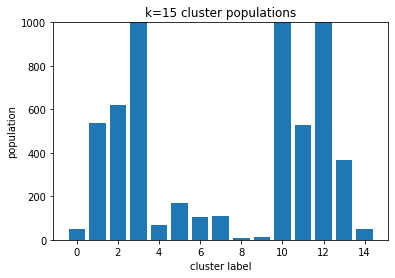

In [29]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('k={} cluster populations'.format(smaller_k));

# truncating the axis again!
plt.ylim(0,1000);

In [30]:
strongest_features(km_model, vec, topk=15)

Cluster 0: let game time start goooo play win elijahhazekamp fucking eyyyyyyyy tech wps roll gooooo streaming
*******************
Cluster 1: game good play watch awesome one time like win watching night right lsuvsuf preseason love
*******************
Cluster 2: america trump realdonaldtrump president first love bless one want state know country biden people like
*******************
Cluster 3: news trump love one like good know amp day time president year sport need im
*******************
Cluster 4: game lsu florida crazy play interception wild pick watching good uf ever delay seen win
*******************
Cluster 5: covid ashanti prevent got vaccine getting positive tested fuck girl usfda real want might hope
*******************
Cluster 6: game day fucking weird pissing best like disaster cherryogurtt lost semifinal bubbagumpino man antoniosabatojr disappointing
*******************
Cluster 7: america bless townhallcom love trump tedcruz open first stclairashley know realdonaldtrump wel

In [31]:
def cluster_sample(orig_text, model, idx, preview=15):
    """
    Helper function to display original bio for
    those users modeled in cluster `idx`.
    """
    for i,idx in enumerate(np.where(model.labels_ == idx)):
        print(orig_text)
        print()
        if i > preview:
            print('( >>> truncated preview <<< )')
            break

In [32]:
# feel free to modify this
interest_idx = 5
cluster_sample(tweet_df['Tweet'], km_model, interest_idx)

0                       @badimo I’m back ltr where’s news 
1        RT @SirDecka: I will give $5 to one person who...
3        @eyerisvex @The_Cerise_Hood The worst game was...
4                                  Covid-19 evolution 🤡🐘😷 
5                                             Sad 😥 story 
7        RT @Chesschick01: Your odds of dying from eati...
8        RT @2tired2retire: @40_Ronda must see video.  ...
9        @SunRayB Playing games for making a video does...
10       Doesn't use a single example of how Cyberpunk ...
12       @lowkeydbjosh More Time limited Game modes and...
16                                          Fucking facts 
17       not the covid vaccine giving volunteers bell’s...
18                 RT @H4NNlB4L: please fucking read this.
21       RT @ruderubik: cyberpunk is when i ripped off ...
22       President Trump Arrives at Army-Navy Game - th...
23       RT @DickWinchester: Well I wonder what tomorro...
24       @armyofskeletons @MSFerr17 @BrianneChitt79 @CT.

<p>Enfin, nous pourrions vouloir regarder une représentation graphique de nos résultats pour obtenir un autre contrôle sur ce que nous avons découvert. En règle générale, dans les modèles textuels, la dimensionnalité de l'espace des fonctionnalités est trop élevée pour les techniques de visualisation directe. Bien que nous ne puissions pas simplement tracer tous les utilisateurs dans l'espace des jetons et les colorer en fonction de leurs clusters, nous pouvons faire quelque chose de similaire si nous appliquons une réduction de dimensionnalité.

Une approche courante pour ce faire consiste à utiliser t-SNE pour créer une vue en 2 ou 3 dimensions des données. Le t-SNE tente de maintenir - dans la représentation de dimension inférieure - une partie de la structure relative présente dans les données originales de haute dimensionnalité. </p>

In [33]:
from MulticoreTSNE import MulticoreTSNE as TSNE
def maybe_fit_tsne(file=None):
    if file is None:
        file = "tweet_matrix_2d.npy"
    try:
        tweet_matrix_2d = np.load(file)
        logging.warning("loading cached TSNE file")
    except FileNotFoundError:
        logging.warning("Fitting TSNE")
        tsne = TSNE(n_components=2,
                    n_jobs=-1,
                    random_state=seed)
        tweet_matrix_2d = tsne.fit_transform(text.todense())

        np.save(file, tweet_matrix_2d)
    return tweet_matrix_2d
tsne_file = "bio_matrix_2d.npy"
tweet_matrix_2d = maybe_fit_tsne(tsne_file)


<p> En deux dimensions, nous pouvons tracer les données. Mieux encore, nous pouvons ajouter des indices visuels supplémentaires pour informer notre inspection des données, comme la coloration en fonction des étiquettes de cluster et l'ajout du contenu textuel d'origine pour une exploration interactive. Pour cela, nous pouvons utiliser certaines des fonctionnalités pratiques de la bibliothèque de traçage bokeh. 

La seule étape supplémentaire que nous devons prendre, cependant, consiste à contraindre nos divers éléments de données dans un cadre de données qui joue bien avec la bibliothèque. </p>


In [34]:
def get_plottable_df(tweet_id, Tweet, two_d_coords, labels):
    """
    Combine the necessary pieces of data to create a data structure that plays
    nicely with the our 2d tsne chart.

    Note: assumes that all argument data series
    are in the same order e.g. the first user, bio, coords, and label
    all correspond to the same user.
    """
    # set up color palette
    num_labels = len(set(labels))
    colors = sns.color_palette('hls', num_labels).as_hex()
    color_lookup = {v:k for k,v in zip(colors, set(labels))}
    # combine data into a single df
    df = pd.DataFrame({'tweet_id': tweet_id,
                       'Tweet': Tweet,
                       'label': labels,
                       'x_val': two_d_coords[:,0],
                       'y_val': two_d_coords[:,1],
                      })
    # convert labels to colors
    df['color'] = list(map(lambda x: color_lookup[x], labels))
    return df

In [35]:
km_plottable_tweet = get_plottable_df(tweet_df['tweet_id'], tweet_df['Tweet'], tweet_matrix_2d, km_model.labels_)

km_plottable_tweet.head()

,tweet_id,Tweet,label,x_val,y_val,color
0,1337924889836216322,@badimo I’m back ltr where’s news,11,3.988090,-0.140400,#9457db
1,1337924889768914944,RT @SirDecka: I will give $5 to one person who...,3,0.459516,-1.859139,#b9db57
3,1337924889819267075,@eyerisvex @The_Cerise_Hood The worst game was...,10,-1.442059,3.423270,#5f57db
4,1337924889832005632,Covid-19 evolution 🤡🐘😷,5,8.465408,0.224174,#57db5f
5,1337924889945251845,Sad 😥 story,3,-5.832356,-9.353561,#b9db57


In [36]:

def plot_tsne(df, title='t-SNE plot'):
    # add our DataFrame as a ColumnDataSource for Bokeh
    plot_data = ColumnDataSource(df)
    # configure the chart
    tsne_plot = figure(title=title, plot_width=800, plot_height=700, tools=('pan, box_zoom, reset'))
    # add a hover tool to display words on roll-over
    tsne_plot.add_tools(
        HoverTool(tooltips = """<div style="width: 400px;">(@label) @Tweet</div>""")
    )
    # draw the words as circles on the plot
    tsne_plot.circle('x_val', 'y_val',
                     source=plot_data,
                     color='color',
                     line_alpha=0.2,
                     fill_alpha=0.1,
                     size=7,
                     hover_line_color='black')
    # configure visual elements of the plot
    tsne_plot.title.text_font_size = '12pt'
    tsne_plot.xaxis.visible = False
    tsne_plot.yaxis.visible = False
    tsne_plot.grid.grid_line_color = None
    tsne_plot.outline_line_color = None
    return tsne_plot

In [38]:
from bokeh.plotting import figure, ColumnDataSource, show, output_notebook; output_notebook()
from bokeh.models import HoverTool


show(plot_tsne(km_plottable_tweet.sample(5000),
               't-sne projection of kmeans-clustered users ["(cluster #) Tweet"]'))

Loading BokehJS ...

---------------------
<h3>IV. CONCLUSION : </h3>
<p>Pour regrouper les documents non structurés,les tweets,
nous avons proposé une technique de clustering basée sur des mots
fréquences des tweets. 

Nous avonsa constaté que notre algorithme proposé surpassait l'algorithme
qui est uniquement basé sur les fréquences des mots.
Nous avons constaté que le centre du cluster pour chaque cluster donne
une signification sémantique à ce cluster. Les sujets impliqués dans tous les tweets pour un cluster particulier de manière intuitive
représentent les mêmes événements que celui du centre. Par conséquent, ces
les centres de cluster peuvent être utilisés pour donner une large catégorie aux
tweets dans ce cluster.
</p>

---------------------
<h3> V. PERSPECTIVES : </h3>
Pour ce qui est de l'avenir de ce projet, on propose : 

   * Evaluer les deux modèles obtenus de deux algorithmes de clustering et deployer le modèle le plus performant 
   * Développer une application mobile pour implementer ce modèle 
   * Utiliser ce modèle pour l'analyse de sentiments des utilisateurs à partir des Tweets

In [46]:
%watermark --iversions

nltk      : 3.5
tweepy    : 3.9.0
re        : 2.2.1
cv2       : 4.2.0
seaborn   : 0.9.0
matplotlib: 3.3.2
logging   : 0.5.1.2
pandas    : 0.24.2
numpy     : 1.19.4

